# Анализ цен на БигМак в разных странах мира

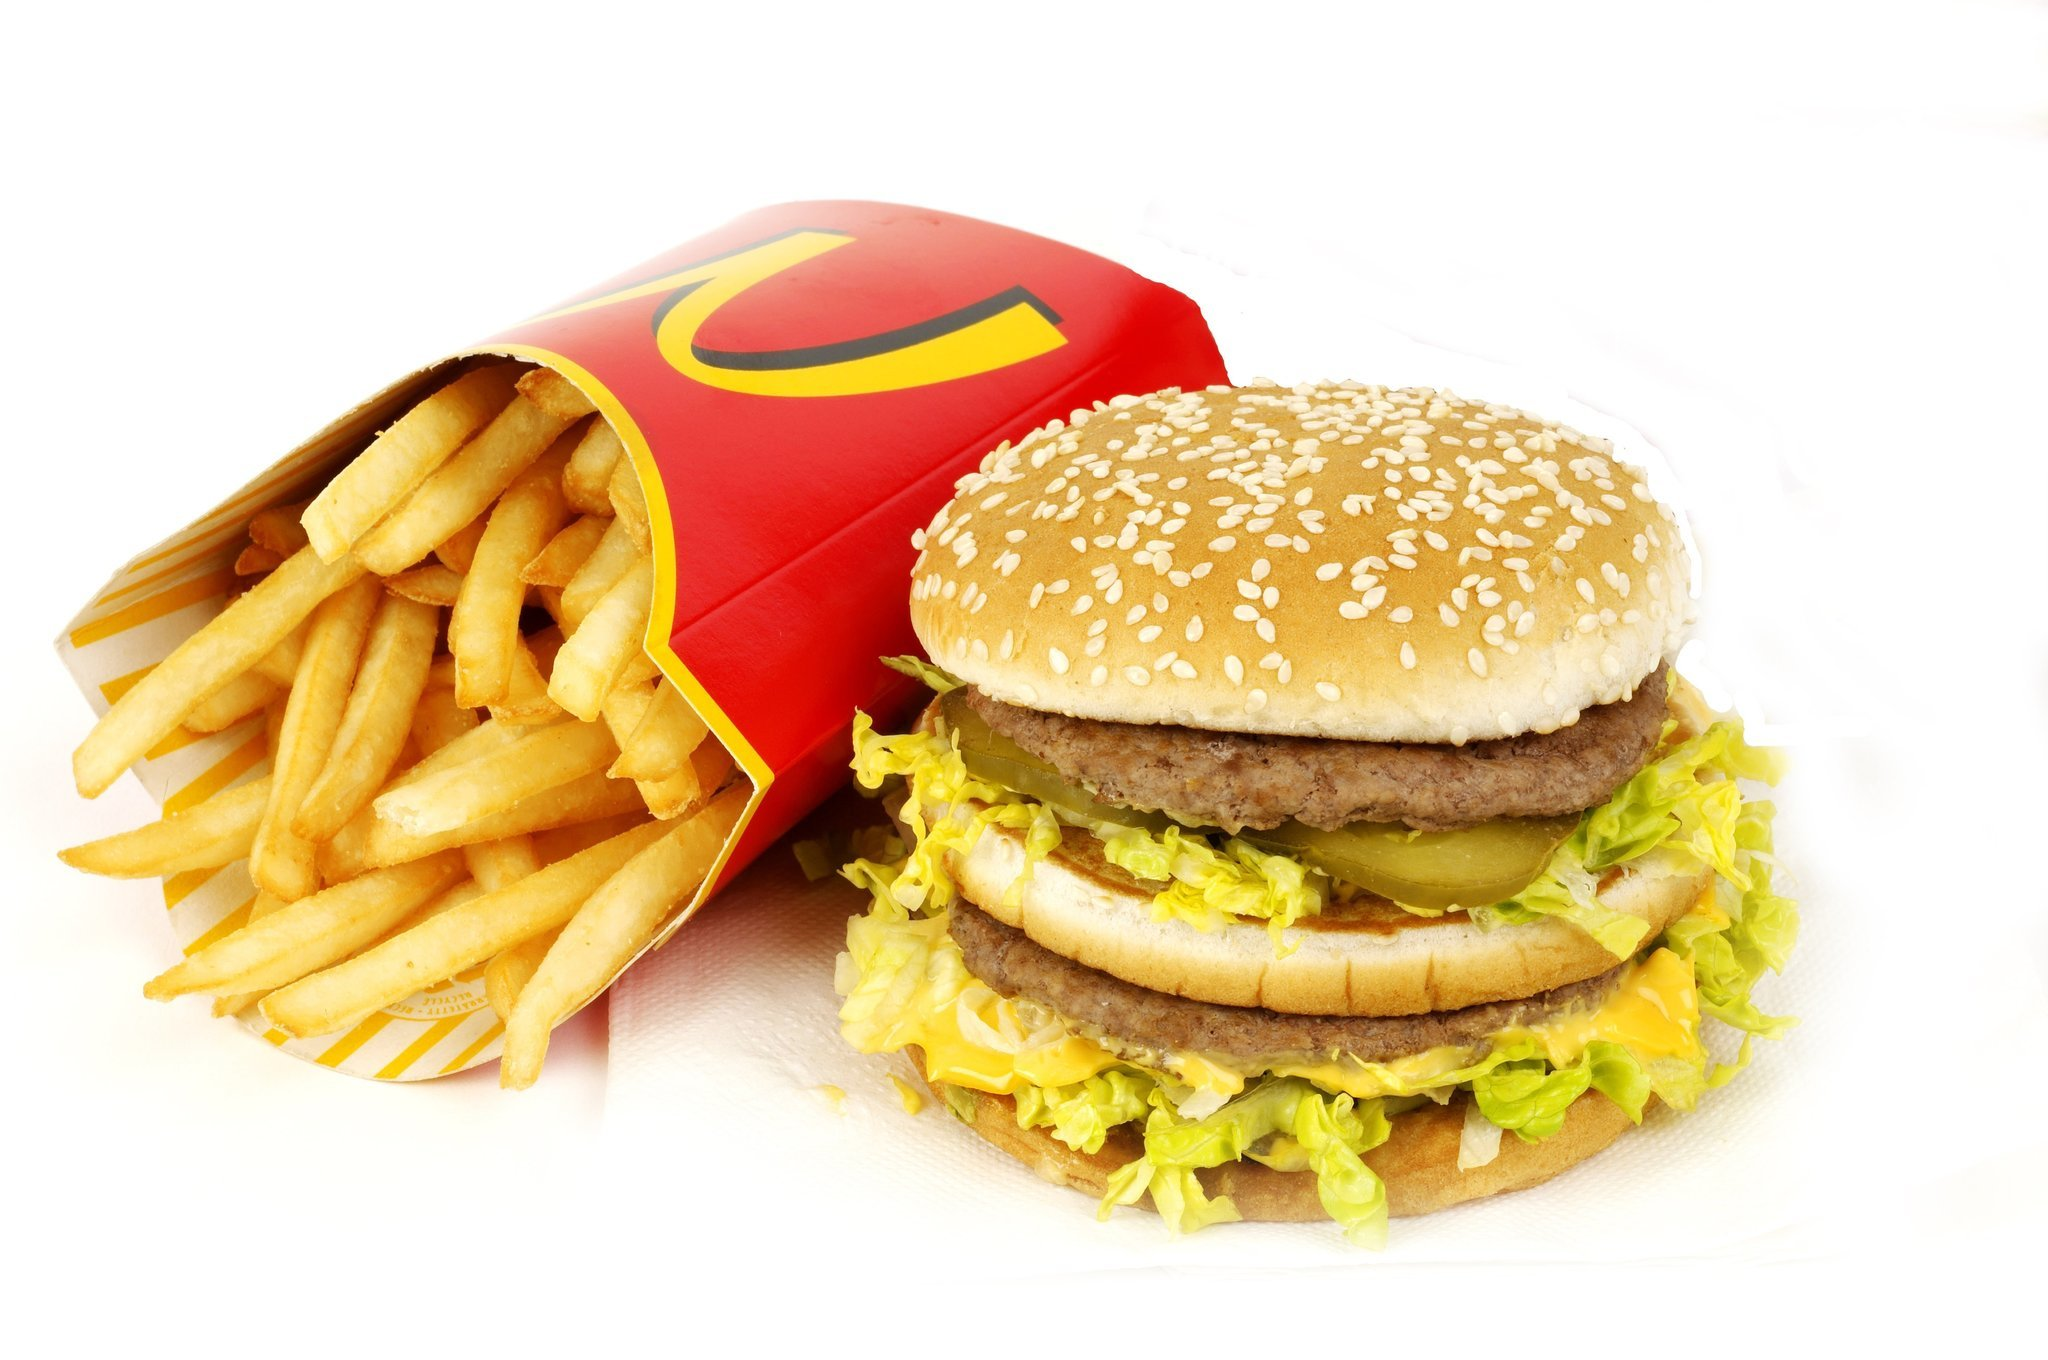

## Этап 1: Подготовка и предварительный анализ данных


#### Главная задача первом этапе: 
+ подготовить данные для детального анализа
+ поменять типы данных на корректные 
+ поменять названия колонок на более понятные
+ проверить наличие "пустых" данных в таблице, а также дубликаты и аномалии

In [1]:
import pandas as pd
df = pd.read_csv("D:\\DOWNLOADS_J\\Programming learning\\Примеры анализов\\BigmacPrice.csv") 

In [2]:
df.sample(5)

,date,currency_code,name,local_price,dollar_ex,dollar_price
321,2007-06-01,CLP,Chile,1565.00,526,2.98
227,2006-01-01,SEK,Sweden,33.00,7,4.71
1338,2018-07-01,MDL,Moldova,43.00,16,2.69
278,2007-01-01,GBP,Britain,1.94,1,1.94
51,2001-04-01,SEK,Sweden,24.00,10,2.40


In [3]:
#просмотрим имеющиеся названия колонок
df.columns

Index(['date', 'currency_code', 'name', 'local_price', 'dollar_ex',
       'dollar_price'],
      dtype='object')

In [4]:
#переименуем колонки
df.columns = ['Date', 'Currency_code', 'Country', 'Local_price', 'Сurrency_rate', 'Dollar_price']

In [5]:
df.head(1)

,Date,Currency_code,Country,Local_price,Сurrency_rate,Dollar_price
0,2000-04-01,ARS,Argentina,2.5,1,2.5


In [6]:
#проверяем и меняем типы данных на корректные
df.dtypes

Date              object
Currency_code     object
Country           object
Local_price      float64
Сurrency_rate      int64
Dollar_price     float64
dtype: object

In [7]:
df['Date'] = df['Date'].astype('datetime64')
df.dtypes

Date             datetime64[ns]
Currency_code            object
Country                  object
Local_price             float64
Сurrency_rate             int64
Dollar_price            float64
dtype: object

In [8]:
#ищем пропуски (пустые ячейки) и по необходимости их заполняем
#пропусков - нет
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1946 non-null   datetime64[ns]
 1   Currency_code  1946 non-null   object        
 2   Country        1946 non-null   object        
 3   Local_price    1946 non-null   float64       
 4   Сurrency_rate  1946 non-null   int64         
 5   Dollar_price   1946 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 91.3+ KB


In [9]:
#проверим уникальные значения в колонке страна
df["Country"].unique()

array(['Argentina', 'Australia', 'Brazil', 'Britain', 'Canada', 'Chile',
       'China', 'Czech Republic', 'Denmark', 'Euro area', 'Hong Kong',
       'Hungary', 'Indonesia', 'Israel', 'Japan', 'Malaysia', 'Mexico',
       'New Zealand', 'Poland', 'Russia', 'Singapore', 'South Africa',
       'South Korea', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand',
       'United States', 'Philippines', 'Norway', 'Peru', 'Turkey',
       'Venezuela', 'Egypt', 'Colombia', 'Costa Rica', 'Pakistan',
       'Saudi Arabia', 'Sri Lanka', 'Ukraine', 'Uruguay', 'UAE',
       'Austria', 'Belgium', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'India', 'Ireland', 'Italy', 'Netherlands', 'Portugal',
       'Spain', 'Lithuania', 'Vietnam', 'Azerbaijan', 'Bahrain',
       'Croatia', 'Guatemala', 'Honduras', 'Jordan', 'Kuwait', 'Latvia',
       'Lebanon', 'Moldova', 'Nicaragua', 'Oman', 'Qatar', 'Romania',
       'Slovakia', 'Slovenia', 'United Arab Emirates'], dtype=object)

In [10]:
#как мы видим, в колонке "Country" присутствует отдельно "Euro area", 
#хотя в списке есть отдельно страны ЕС (Greece,Germany,Italy и т.д.).
#Будет целесообразнее удалить информацию по "Euro area"
df.drop(df[df.Country == "Euro area"].index, inplace=True)

In [11]:
df.shape #проверяем удаление (было 1946 строк, удалилось 37 строк с "Euro area", осталось 1909)

(1909, 6)

In [12]:
#проведем предварительный анализ данных
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Local_price,1909.0,16123.0,397801.0,0.0,5.0,16.0,89.0,16020000.0
Сurrency_rate,1909.0,4814.0,101592.0,1.0,1.0,5.0,33.0,3613989.0
Dollar_price,1909.0,4.0,1.0,0.0,3.0,3.0,4.0,11.0


In [13]:
#находим строку, где минимальный показатель цены равен "0"
df[df["Dollar_price"] == df["Dollar_price"].min()]

,Date,Currency_code,Country,Local_price,Сurrency_rate,Dollar_price
1296,2018-01-01,VEF,Venezuela,0.0,1,0.0


In [14]:
#удалим этот "0", так как нет более подробной информации о причине его присутствия
#цену БигМака в 0 долларов можно считать некорректной
df.drop(df[df.Local_price == 0.00].index, inplace=True)

In [15]:
#минимум цены, без "0"
df[df["Dollar_price"] == df["Dollar_price"].min()].head(1)

,Date,Currency_code,Country,Local_price,Сurrency_rate,Dollar_price
1016,2015-07-01,VEF,Venezuela,132.0,197,0.67


## Этап 2: Визуализация

+ график, показывающий динамику средней цены (в долларах) по годам
+ график, показывающий ТОП-5 стран с "минимальными ценами" и ТОП-5 стран с "максимальными ценами" за весь период

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
#посчитаем средние цены (в долларах) по годам для всех стран
groupped_mean = df.groupby(['Date','Country']).Dollar_price.agg("mean").reset_index().round()
groupped_mean.head(3)

,Date,Country,Dollar_price
0,2000-04-01,Argentina,2.0
1,2000-04-01,Australia,3.0
2,2000-04-01,Brazil,3.0


(10957.0, 19723.0)

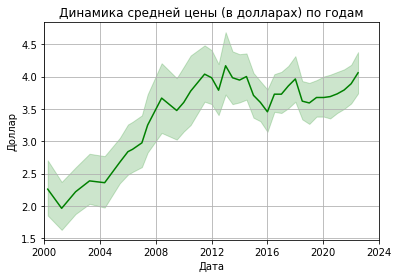

In [18]:
#график, показывающий динамику средней цены (в долларах) по годам
sns.lineplot(groupped_mean, x = groupped_mean["Date"], y = groupped_mean["Dollar_price"], color="green")
plt.grid()
plt.xlabel('Дата')
plt.ylabel('Доллар')
plt.title('Динамика средней цены (в долларах) по годам')
plt.xlim(pd.Timestamp('2000'), pd.Timestamp('2024'))

Text(0.5, 1.0, 'ТОП-5 стран с "минимальными ценами"')

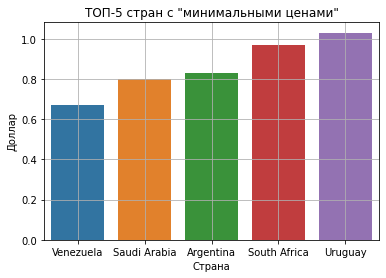

In [19]:
#график, показывающий ТОП-5 стран с "минимальными ценами"
df_min = df.groupby('Country').Dollar_price.agg("min").sort_values(ascending=True).reset_index().head(5)
sns.barplot(x = df_min["Country"], y = df_min["Dollar_price"], data = df_min)
plt.grid()
plt.xlabel('Страна')
plt.ylabel('Доллар')
plt.title('ТОП-5 стран с "минимальными ценами"')

(0.0, 12.0)

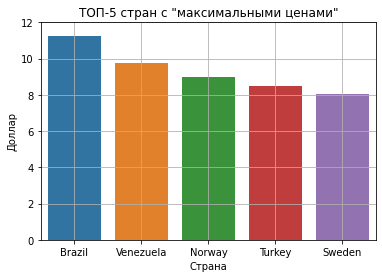

In [20]:
#график, показывающий ТОП-5 стран с ТОП-5 стран с "максимальными ценами"
df_max = df.groupby('Country').Dollar_price.agg("max").sort_values(ascending=False).reset_index().head(5)
sns.barplot(x = df_max["Country"], y = df_max["Dollar_price"], data = df_max)
plt.grid()
plt.xlabel('Страна')
plt.ylabel('Доллар')
plt.title('ТОП-5 стран с "максимальными ценами"')
plt.ylim(0,12)

In [21]:
#Создаём новый датафрейм для создания анимированного графика
df_scatter = df.copy()

In [22]:
#меняем формат даты для создания анимированного графика
df_scatter["Date"] = df_scatter["Date"].astype("str")

In [23]:
#сортируем страны по алфавиту для большей наглядности
df_scatter = df_scatter.sort_values(by = "Country")

# График можно посмотреть перейдя по ссылке: 
# [Динамика цен по странам и датам](https://github.com/DND-Nikolai/Analytics_examples/blob/main/BigMac_Prices_Analysis.ipynb)

In [45]:
#строим анимированный график
import plotly.express as px
fig1 = px.scatter(df_scatter, x="Dollar_price", y="Country", hover_name="Date",
                  range_x=[0,12], range_y=[0,74], 
                  title = "Динамика цен по странам и датам", size="Dollar_price", color="Country", height=1500)
fig1.show()

## Этап 3: Выводы

**Всего в датасете представлена информация по 73-м странам за период с 2000 г. по 2022 г.**

На этапе подготовки данных, выяснилось, что в датасете присутствовала некорректная информация, в частности:

- наличие "Euro area" в колонке стран
- наличие некорректной минимальной цены (0 долларов)

Предварительный анализ показал, что 75% цен меньше или равны значению в 4 доллара. \
А среднее отклонение цены составляет 1 доллар.

**Наименьшие цены на БигМак были зафиксированы в следующих странах:**
1. Венесуэла (в 2016 г. БигМак стоил 0.67 долларов)
2. Саудовская Аравия
3. Аргентина

**Наибольшие:**
1. Бразилия (в 2013 г. БигМак стоил 11.25 долларов)
2. Венесуэла
3. Норвегия

**На графике "Динамика цен по странам и датам" можно найти цену БигМака \
в каждой отдельной стране из представленного списка, по конкретной дате.**
